<a href="https://colab.research.google.com/github/olusegunadelowo/Polish_Companies_Bankrupcy_Prediction/blob/main/Polish_Companies_Bankrupcy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import gzip                                                                                 #Python library to decompressed a compressed file.
import json                                                                                 #Python library to load json file into a dictonary.
from scipy.io import arff                                                                   #Python package to read attribute-relation file format.
import pandas as pd                                                                         #Python library to for table and graphics.
import pickle  as pk                                                                        #Python library for saving a model.
import matplotlib.pyplot as plt                                                             #Python library for graph manipulation
import seaborn as sns                                                                       #Python library for graph manipulation
from imblearn.over_sampling import RandomOverSampler                                        #Python package for over_sampling an imbalanced classes
from imblearn.under_sampling import RandomUnderSampler                                      #Python package for under_sampling an imbalanced classes
from sklearn.impute import SimpleImputer                                                    #Python package for filling missing values
from sklearn.metrics import ConfusionMatrixDisplay                                          #Python package for displaying a confusion matrix metric
from sklearn.model_selection import train_test_split                                        #Python package for splitting dataset into train and test dataset.
from sklearn.pipeline import make_pipeline                                                  #Python package for building a pipeline
from sklearn.tree import DecisionTreeClassifier                                             #Python package for importing a decision tree classifier algorithm
from sklearn.ensemble import RandomForestClassifier                                         #Python package for importing a random forest classifier algorithm
from sklearn.ensemble import GradientBoostingClassifier                                     #Python package for importing a gradient boosting classifier algorithm
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split         #Python packages for importing a GridSearhCV and cross_val_score


## `Mount and Import Data from GoogleDrive`
Since we are importing our dataset from the google drive, we need to mount it on the google drive first

In [ ]:
#Mounts the dataset from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Build a wrangle function to import dataset from where it's mounted.
def wrangle(filepath , index):       #defines
  data = arff.loadarff(filepath)
  df = pd.DataFrame(data[index])
  return df

In [ ]:
#import the dataset and display the first 5 observations
df = wrangle('/content/gdrive/MyDrive/Data Science Projects/Polish_Companies_Bankrupcy_Prediction/2year.arff', 0)
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'


In [ ]:
#Rename target feature as  Bankrupt and display 1st 5 observations
df.rename(columns = {'class':'Bankrupt'}, inplace = True)
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,Bankrupt
0,0.202350,0.46500,0.240380,1.5171,-14.547,0.510690,0.25366,0.91816,1.15190,0.42695,...,0.13184,0.473950,0.86816,0.00024,8.5487,5.16550,107.740,3.38790,5.3440,b'0'
1,0.030073,0.59563,0.186680,1.3382,-37.859,-0.000319,0.04167,0.67890,0.32356,0.40437,...,0.12146,0.074369,0.87235,0.00000,1.5264,0.63305,622.660,0.58619,1.2381,b'0'
2,0.257860,0.29949,0.665190,3.2211,71.799,0.000000,0.31877,2.33200,1.67620,0.69841,...,0.16499,0.369210,0.81614,0.00000,4.3325,3.19850,65.215,5.59690,47.4660,b'0'
3,0.227160,0.67850,0.042784,1.0828,-88.212,0.000000,0.28505,0.47384,1.32410,0.32150,...,0.29358,0.706570,0.78617,0.48456,5.2309,5.06750,142.460,2.56210,3.0066,b'0'
4,0.085443,0.38039,0.359230,1.9444,21.731,0.187900,0.10823,1.37140,1.11260,0.52167,...,0.10124,0.163790,0.89876,0.00000,5.7035,4.00200,89.058,4.09840,5.9874,b'0'


In [ ]:
#display the datatype and the missing values of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Attr1     10172 non-null  float64
 1   Attr2     10172 non-null  float64
 2   Attr3     10172 non-null  float64
 3   Attr4     10151 non-null  float64
 4   Attr5     10149 non-null  float64
 5   Attr6     10172 non-null  float64
 6   Attr7     10172 non-null  float64
 7   Attr8     10155 non-null  float64
 8   Attr9     10169 non-null  float64
 9   Attr10    10172 non-null  float64
 10  Attr11    10172 non-null  float64
 11  Attr12    10151 non-null  float64
 12  Attr13    10110 non-null  float64
 13  Attr14    10172 non-null  float64
 14  Attr15    10161 non-null  float64
 15  Attr16    10154 non-null  float64
 16  Attr17    10155 non-null  float64
 17  Attr18    10172 non-null  float64
 18  Attr19    10109 non-null  float64
 19  Attr20    10110 non-null  float64
 20  Attr21    7009 non-null   fl

Key things to observe from the above is that some of our dataset features have missing values and the only the labelled feature is of the type object(string). Other features are of the datatype float.In order to train this dataset with any algoritm, we need to fill the features with simpleimputers and convert the labelled feature to string

In [ ]:
#Covert Bankrupt datatype from string to integer
df['Bankrupt'] = df['Bankrupt'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Attr1     10172 non-null  float64
 1   Attr2     10172 non-null  float64
 2   Attr3     10172 non-null  float64
 3   Attr4     10151 non-null  float64
 4   Attr5     10149 non-null  float64
 5   Attr6     10172 non-null  float64
 6   Attr7     10172 non-null  float64
 7   Attr8     10155 non-null  float64
 8   Attr9     10169 non-null  float64
 9   Attr10    10172 non-null  float64
 10  Attr11    10172 non-null  float64
 11  Attr12    10151 non-null  float64
 12  Attr13    10110 non-null  float64
 13  Attr14    10172 non-null  float64
 14  Attr15    10161 non-null  float64
 15  Attr16    10154 non-null  float64
 16  Attr17    10155 non-null  float64
 17  Attr18    10172 non-null  float64
 18  Attr19    10109 non-null  float64
 19  Attr20    10110 non-null  float64
 20  Attr21    7009 non-null   fl

# `Exploratory Data Analysis (EDA)`
Univariate Analysis [Target Variable]

In [ ]:
#Count the value of the classes in the target feature and represent in percentage
df['Bankrupt'].value_counts(normalize = True)

0    0.96068
1    0.03932
Name: Bankrupt, dtype: float64

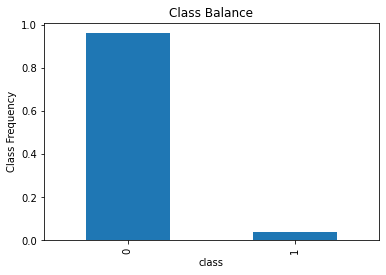

In [ ]:
#Represent the percentages of the classes in a vertical bar chart using pandas
df['Bankrupt'].value_counts(normalize = True).plot(kind = "bar" , xlabel = "class" , ylabel = "Class Frequency" , title = "Class Balance")

From the univariate analysis of the target variable, it was observed that more than 96% of the class is 0 while less than 4% of the class is 1.While 0 denotes no bakruptcy, 1 denotes bankruptcy. What this means is that majority of the class shows no bankruptcy while minoriy of the class shows  bankruptcy.Majority Class is negative class while minority class is positive class

## `Bivariate Analysis of [Attr27] and target feature "Bankrupt"
Distribution of the Attr27 feature. A normal distribution should not be skewed to either right or left.It should be a guassian or tends towards a guassian distribution


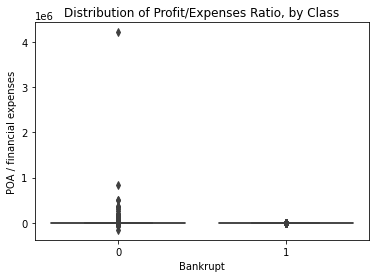

In [ ]:
# Create boxplot with seaborn and matplotlib
sns.boxplot(x = "Bankrupt" , y = "Attr27" , data = df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [ ]:
# Summary statistics for `feat_27`
df["Attr27"].describe().apply("{0:,.0f}".format)

count        9,467
mean         1,243
std         45,911
min       -157,160
25%              0
50%              1
75%              5
max      4,208,800
Name: Attr27, dtype: object

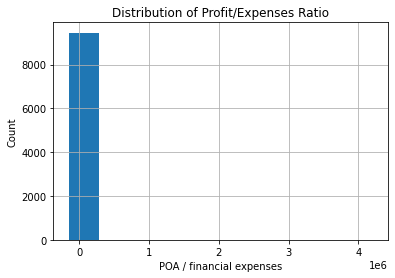

In [ ]:
# Plot histogram of `Attr27`with matplotlib
df["Attr27"].hist()
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

Both Boxplot and Histogram show there are lots of outliers and the data in attr27 is skewed. To reduce the effect on the outlier and to reduce the skeweness so that the data tends towards the normal distribution, we need to quantize the data

In [ ]:
#Quantizing the data in Attr27
q1, q9 = df["Attr27"].quantile([0.1, 0.9])
mask = df["Attr27"].between(q1,q9)
mask.head()

0     True
1    False
2    False
3     True
4     True
Name: Attr27, dtype: bool

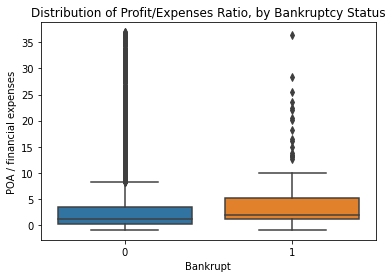

In [ ]:
# Create clipped boxplot
q1,q9 = df["Attr27"].quantile([0.1, 0.9])
mask = df["Attr27"].between(q1,q9)
sns.boxplot(x = "Bankrupt" , y = "Attr27" , data = df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

## Univariate Analysis [Attr35] Numeric Feature Distribution
A normal distribution should not be skewed to either right or left

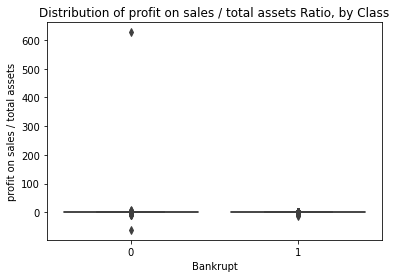

In [ ]:
# Explore another feature
# Create boxplot with seaborn and matplotlib
sns.boxplot(x = "Bankrupt" , y = "Attr35" , data = df)
plt.xlabel("Bankrupt")
plt.ylabel("profit on sales / total assets")
plt.title("Distribution of profit on sales / total assets Ratio, by Class");

In [ ]:
# Summary statistics for `Attr35`
df["Attr35"].describe().apply("{0:,.0f}".format)

count    10,172
mean          0
std           6
min         -61
25%           0
50%           0
75%           0
max         627
Name: Attr35, dtype: object

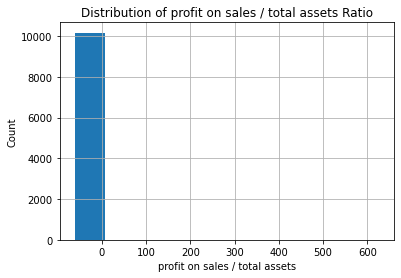

In [ ]:
# Plot histogram of `Attr35`with matplotlib
df["Attr35"].hist()
plt.xlabel("profit on sales / total assets")
plt.ylabel("Count"),
plt.title("Distribution of profit on sales / total assets Ratio");

In [ ]:
q1,q9 = df["Attr35"].quantile([0.1, 0.9])
mask = df["Attr35"].between(q1,q9)
mask.head()

0     True
1     True
2     True
3    False
4     True
Name: Attr35, dtype: bool

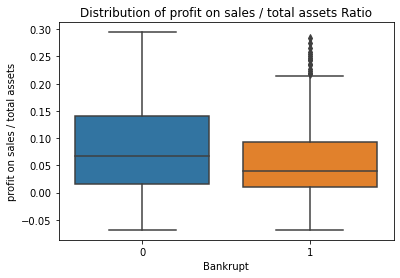

In [ ]:
# Create clipped boxplot
q1,q9 = df["Attr35"].quantile([0.1, 0.9])
mask = df["Attr35"].between(q1,q9)
sns.boxplot(x = "Bankrupt" , y = "Attr35" , data = df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("profit on sales / total assets")
plt.title("Distribution of profit on sales / total assets Ratio");

## Bivariate Analysis (Correlations among numeric features)
Features which have high correlation against each other are not good predictors

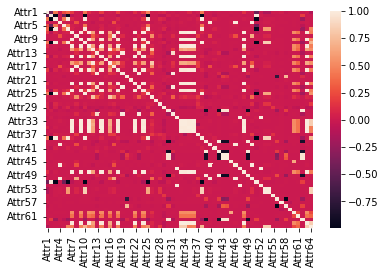

In [ ]:
#Features correlation
corr = df.drop(columns = "Bankrupt").corr()
sns.heatmap(corr);

## EDA Inferences
1. This data is imbalanced. It needs to be addressed in our data preparation.
2. Many of the features have missing values that we'll need to impute.
3. The features are highly skewed, the best imputation strategy is likely
   median, not mean.
4. The numeric features have autocorrelation issues, which means that we should
   steer clear of linear models, and try a tree-based model instead.

# Feature Engineering
Split Data into Train and Test Sets

In [ ]:
#Create your feature matrix X and target vector y. Your target is "Bankrupt"
target = "Bankrupt"
X = df.drop(columns = target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (10173, 64)
y shape: (10173,)


In [ ]:
# To build a generalized model, we need to put aside a test set that we'll use to evaluate our model once it's trained.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8138, 64)
y_train shape: (8138,)
X_test shape: (2035, 64)
y_test shape: (2035,)


**Resampling**
This is necessay to address Class Imbalance

In [ ]:
#Resample the training data
#UnderSampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(658, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,-0.030605,0.784100,-0.021721,0.97062,-59.384,0.030761,-0.044389,0.27534,1.0110,0.21590,...,-3404.2,0.010863,-0.14176,0.98914,0.20698,7.0330,3.3014,169.5500,2.1527,5.6385
1,0.305580,0.274000,0.388420,2.41760,47.014,0.728110,0.305700,2.58510,1.1151,0.70833,...,27148.0,0.103190,0.43141,0.89681,0.00000,23.5400,5.3009,40.4540,9.0226,7.3234
2,0.144880,0.026375,0.905660,36.38900,63.781,0.000653,0.179290,36.91500,3.4624,0.97363,...,4662.4,0.049614,0.14881,0.94834,0.00000,10.2630,15.3640,2.6978,135.3000,50.3620
3,0.161460,0.617080,0.355110,1.57550,17.713,0.268820,0.199980,0.52354,1.1451,0.32306,...,10987.0,0.126690,0.49977,0.87331,0.00000,5.9491,4.0216,136.6700,2.6706,59.2650
4,0.252420,0.534390,-0.170570,0.59802,-83.977,0.735870,0.312190,0.66391,1.2428,0.35478,...,-492830.0,0.195340,0.71149,0.80466,0.31023,27.1090,13.9940,92.8610,3.9306,2.2350


In [ ]:
#check if the undersampling was correct
y_train_under.value_counts(normalize = True)

0    0.5
1    0.5
Name: Bankrupt, dtype: float64

In [ ]:
#Resample the training data
#OverSampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(15618, 64)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,-0.192570,0.35227,0.510510,2.47700,26.790,-0.204360,-0.192570,1.83870,1.5966,0.64773,...,9240.60,-0.229590,-0.29730,1.10780,0.000000,4.3649,4.4739,79.015,4.6194,11.0980
1,0.049627,0.57736,0.068764,1.34300,13.889,0.356470,0.056439,0.73202,1.3626,0.42264,...,212.00,0.029517,0.11742,0.95991,0.574060,76.3820,5.5716,53.694,6.7977,1.8646
2,0.041653,0.69981,0.105580,1.15400,-67.647,-0.244890,0.041653,0.42896,2.5568,0.30019,...,908.47,0.329970,0.13876,0.67228,0.008447,7.7514,6.7573,97.898,3.7284,12.2530
3,0.072353,0.41568,-0.069933,0.79088,-19.469,0.156670,0.072353,1.21350,1.0147,0.50441,...,-1376.90,0.014466,0.14344,0.98553,0.161110,31.8390,24.6310,34.355,10.6240,4.8305
4,0.030057,0.89885,0.076174,1.08640,-54.415,-0.000038,0.035324,0.11254,2.4688,0.10115,...,359.88,0.038305,0.29714,0.98572,0.117300,5.7059,4.7257,130.290,2.8014,57.9880


In [ ]:
#check if the oversampling was correct
y_train_over.value_counts(normalize = True)

0    0.5
1    0.5
Name: Bankrupt, dtype: float64

# **Modelling (Decision Tree Algorithm)**
## **Baseline**
Baseline accurate set a value in which the accuracy of our model must be.For data with imbalaced dataset, accuracy can not be used to judged model performance because majority classes outweighed the minority classes

In [ ]:
#Baseling showing 95% belongs to a negative class
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9596


## **Build Model**
In order to build a model, we need to create a pipeline that contains the simple imputer that neuralizes the effect of missing values and an algorithm to train our model

In [ ]:
#Creates a pipeline`
model_decision = make_pipeline(SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state = 42))
# Fit on `X_train`, `y_train
model_decision.fit(X_train, y_train)

#Create a pipeline for a model to train undersampled dataset
model_under_decision = make_pipeline(SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state = 42))

# Fit on `X_train_under`, `y_train_under`
model_under_decision.fit(X_train_under, y_train_under)


#Create a pipeline for a model to train oversampled dataset
model_over_decision = make_pipeline(SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state = 42))
# Fit on `X_train_over`, `y_train_over`
model_over_decision.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## **Evaluate Model**
## Accuracy Score

In [ ]:
for m in [model_decision, model_under_decision, model_over_decision]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9469
Training Accuracy: 0.6924
Test Accuracy: 0.6934
Training Accuracy: 1.0
Test Accuracy: 0.9641


The results above shows oversampling yields better accuracy than undersampling for the dataset being worked on.Therefore, we will use oversampling for other models

## Confusion Matrix

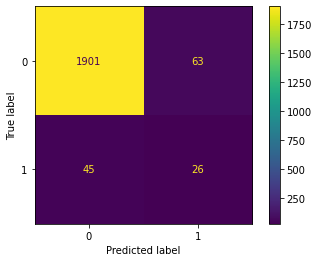

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_decision, X_test, y_test);

In [ ]:
depth = model_over_decision.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

29


# **Communicate Results**

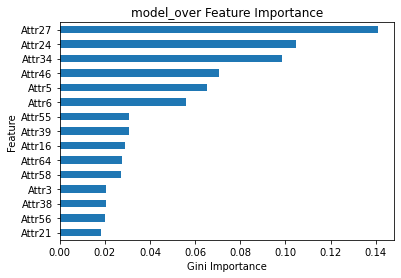

In [ ]:
# Get importances
importances = model_over_decision.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

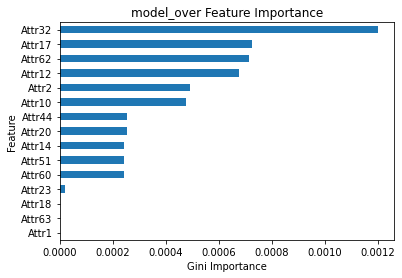

In [ ]:
# Get importances
importances = model_over_decision.named_steps["decisiontreeclassifier"].feature_importances_

# Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot series
feat_imp.head(15).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("model_over Feature Importance");

In [ ]:
# Save your model as `"model__decision"`
with open("model_decision_file" , "wb") as f:
    pk.dump(model_over_decision, f)

In [ ]:
# Load `"model_decision.pkl"`
with open("model_decision_file" , "rb") as f:
    loaded_model_decision = pk.load(f)
print(loaded_model_decision)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])


# **Modelling (Random Forest)**
## **Baseline**

In [ ]:
#Baseling showing 95% belongs to a negative class
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.9596


In [ ]:
#Instantiate an object of a classifier to build a model pipeline with imputer and randomforest classifier as paramenters
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


## **Model building**

In [ ]:
#create a cross validation accuracy scores for k=5 folds
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.99807939 0.99903969 0.99679898 0.99839898 0.99775857]


## **Hyperparameter Tuning**

In [ ]:
#Create parameters to tune
params = {"simpleimputer__strategy":["mean","median"],
          "randomforestclassifier__n_estimators":range(25,100,25),
          "randomforestclassifier__max_depth":range(10,50,10)}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [ ]:
#create a model using gridsearchcv to iterate through the parameters
model_randforest = GridSearchCV(clf, param_grid=params, cv=5, n_jobs = -1, verbose = 1)
model_randforest

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [ ]:
# Train model on oversampled data
model_randforest.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [ ]:
#datatype for model.cv_results_
type(model_randforest.cv_results_)

dict

In [ ]:
cv_results = pd.DataFrame(model_randforest.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.254521,0.017064,0.019447,0.005872,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.988476,0.981434,0.979513,0.983029,0.984310,0.983353,0.003023,21
1,1.349486,0.024351,0.015088,0.000188,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.983995,0.980154,0.979193,0.980147,0.980467,0.980791,0.001658,23
2,2.477800,0.029580,0.025999,0.000999,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.985915,0.982074,0.979834,0.985591,0.984310,0.983545,0.002295,20
3,2.555345,0.024599,0.027072,0.002212,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.981434,0.979834,0.977273,0.983349,0.980147,0.980407,0.001997,24
4,3.690852,0.016145,0.034792,0.000721,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.987516,0.983355,0.981434,0.985591,0.983990,0.984377,0.002058,19
5,3.797413,0.019655,0.041047,0.008611,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.983035,0.982714,0.977273,0.983990,0.983349,0.982072,0.002436,22
6,1.421711,0.012904,0.016988,0.001262,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.998399,0.998079,0.995519,0.996798,0.997118,0.997183,0.001020,17
7,1.529576,0.014999,0.017236,0.000727,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997439,0.996799,0.995519,0.997438,0.996798,0.996799,0.000701,18
8,2.858092,0.032159,0.028282,0.000583,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997759,0.998720,0.995519,0.997759,0.997118,0.997375,0.001060,14
9,2.975517,0.054358,0.028993,0.000814,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.997439,0.998079,0.996159,0.997438,0.997118,0.997247,0.000627,15


In [ ]:
# Extract best hyperparameters
model_randforest.best_params_

{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 25,
 'simpleimputer__strategy': 'mean'}

In [ ]:
# Extract best score
model_randforest.best_score_

0.9982712418662413

In [ ]:
# Extract best estimator
model_randforest.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=30, n_estimators=25,
                                        random_state=42))])

In [ ]:
y_pred_over = model_randforest.predict(X_train_over)
y_pred_over

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
X_test_over, y_test_over = over_sampler.fit_resample(X_test, y_test) #fit over_sampler on X_test, y_test
print("X_test_over shape:", X_test_over.shape)
print("y_test_over shape:", y_test_over.shape)
X_test_over.head()

X_test_over shape: (3928, 64)
y_test_over shape: (3928,)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
0,0.147930,0.15807,0.745460,6.5463,101.1300,0.000000,0.176420,5.32640,1.6115,0.84193,...,7227.3,0.063348,0.175700,0.89548,0.00000,4.9590,7.5964,30.443,11.9890,13.4140
1,-0.058150,0.29282,0.447860,2.6104,22.0610,0.000000,-0.058150,2.41510,1.7315,0.70718,...,1296.7,-0.025776,-0.082229,1.03340,0.00639,5.0091,4.6369,58.624,6.2261,6.3186
2,0.452680,0.17496,0.811740,5.6396,185.7400,0.000000,0.559470,4.71560,1.9795,0.82504,...,1739.5,0.267150,0.548680,0.72228,0.00000,687.6000,6.4922,32.261,11.3140,148.7800
3,0.061942,0.61124,0.087215,1.1841,-67.8040,0.215740,0.075846,0.62118,1.1024,0.37969,...,30423.0,0.092871,0.163140,0.90713,0.36216,4.5251,5.9886,122.960,2.9685,3.2029
4,0.034872,0.84491,0.159110,1.1963,-2.3614,0.083962,0.035325,0.17612,1.0100,0.14881,...,95718.0,0.009939,0.234340,0.99006,0.23211,26.1710,7.9769,59.179,6.1677,163.7800


In [ ]:
acc_train = model_randforest .score(X_train_over, y_train_over)
acc_test = model_randforest.score(X_test_over, y_test_over)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.6441


In [ ]:
y_test.value_counts(normalize = True)

0    0.965111
1    0.034889
Name: Bankrupt, dtype: float64

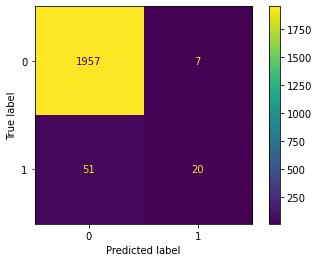

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_randforest, X_test, y_test);

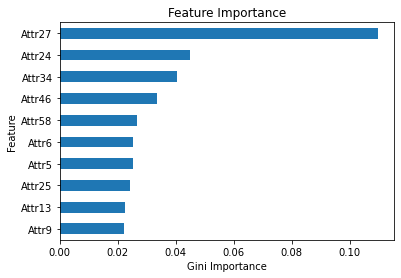

In [ ]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = model_randforest.best_estimator_.named_steps["randomforestclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [ ]:
# Save your model as `"model_randforest_file"`
with open("model_randforest_file" , "wb") as f:     #write into a file name "model_randforest_file"
    pk.dump(model_randforest, f)              #dump model_over in "model_randforest_file"

# **Modelling (Gradient Boost )**